## Unrealinearity... ...
..or just a bunch of celebrity activation functions :)
Playing around in numpy and matplot lib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

Some notes...

Rectified Linear Unit (ReLU): ReLU is a popular activation function for deep neural networks, especially in convolutional neural networks (CNNs) used for computer vision tasks. It is defined as ReLU(x) = max(0, x), where x is the input to the activation function. ReLU is computationally efficient and helps to mitigate the vanishing gradient problem. However, it can suffer from the "dying ReLU" problem, where some neurons may become inactive and output zero for all inputs.

Sigmoid is a common activation function used in binary classification tasks where the goal is to predict probabilities. It is defined as Sigmoid(x) = 1 / (1 + exp(-x)), where exp is the exponential function. Sigmoid maps inputs to a range between 0 and 1, which can represent probabilities. However, it can suffer from the "vanishing gradient" problem for deep neural networks, as gradients become very small for large inputs.

Tanh is another popular activation function that maps inputs to a range between -1 and 1. It is defined as tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)). Tanh can be used in similar scenarios as sigmoid, but it has a steeper gradient around zero, which can help with faster convergence compared to sigmoid.

Softmax is an activation function used in multi-class classification tasks where the goal is to predict probabilities for multiple classes. Softmax takes a vector of inputs and normalizes them to probabilities that sum up to 1. It is commonly used in the output layer of a neural network for multi-class classification tasks.

The Swish activation function is a popular activation function that was proposed by Ramachandran et al. in 2017. It is a smooth, continuous function that has been shown to outperform other activation functions, such as ReLU, in some deep neural network architectures.

GeLU (Gaussian Error Linear Unit): GeLU is an activation function that was introduced by Hendrycks and Gimpel in 2016. GeLU is a smooth, continuous function that approximates the rectified linear unit (ReLU) activation function but with a smooth transition around zero, which can help mitigate the "dying ReLU" problem.

New GeLU (New Gaussian Error Linear Unit): New GeLU is a variant of the original GeLU that was proposed by Daniel Stamate and Thomas Unterthiner in 2021. The main difference between GeLU and New GeLU is in the scaling factor used for the tanh function. In New GeLU, the scaling factor is fixed at 0.79788456, which is a more accurate approximation of the optimal value compared to the sqrt(2/pi) used in the original GeLU. The fixed scaling factor in New GeLU also makes it computationally more efficient as it does not require the additional calculation of sqrt(2/pi) for each input.

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def hard_sigmoid(x):
    return np.clip((x + 1)/2, 0, 1)

def relu(x):
    return x * (x > 0)

def relu6(x):
    return np.clip(x, 0, 6)

def tanh(x):
    return np.tanh(x)

def elu(x, alpha=1):
    return ((x > 0)*x + (x <= 0) * (alpha * np.exp(x) - alpha))

def gelu(x, beta = 0.044715):
    return 0.5 + x * (1.0 + np.tanh(np.sqrt(2.0 / np.pi) * (x + beta * np.power(x, 3.0))))

def new_gelu(x, scale = 0.79788456, beta = 0.044715 ):
    return 0.5 + x * (1.0 + np.tanh(scale * (x + beta * np.power(x, 3.0))))

def identity(x):
    return x

def selu(x, alpha = 1.6732632423543772848170429916717, scale=1.0507009873554804934193349852946):
    return scale * ((x > 0)*x + (x <= 0) * (alpha * np.exp(x) - alpha))

def threshold(x, limit=1):
    return np.clip(x,None,limit)

def prelu(x, a=0.1):
    return np.where(x > 0, x, x * a)

def leaky_relu(x):
    return prelu(x, a=0.01)
    
def softplus(x):
    return np.log(1+np.exp(x))

def swish(x, beta = 0.5):
    return x * (1/(1+np.exp(-(beta*x))))

def sinusoid(x):
    return np.sin(x)

def sinc(x):
    return np.sin(x)/x

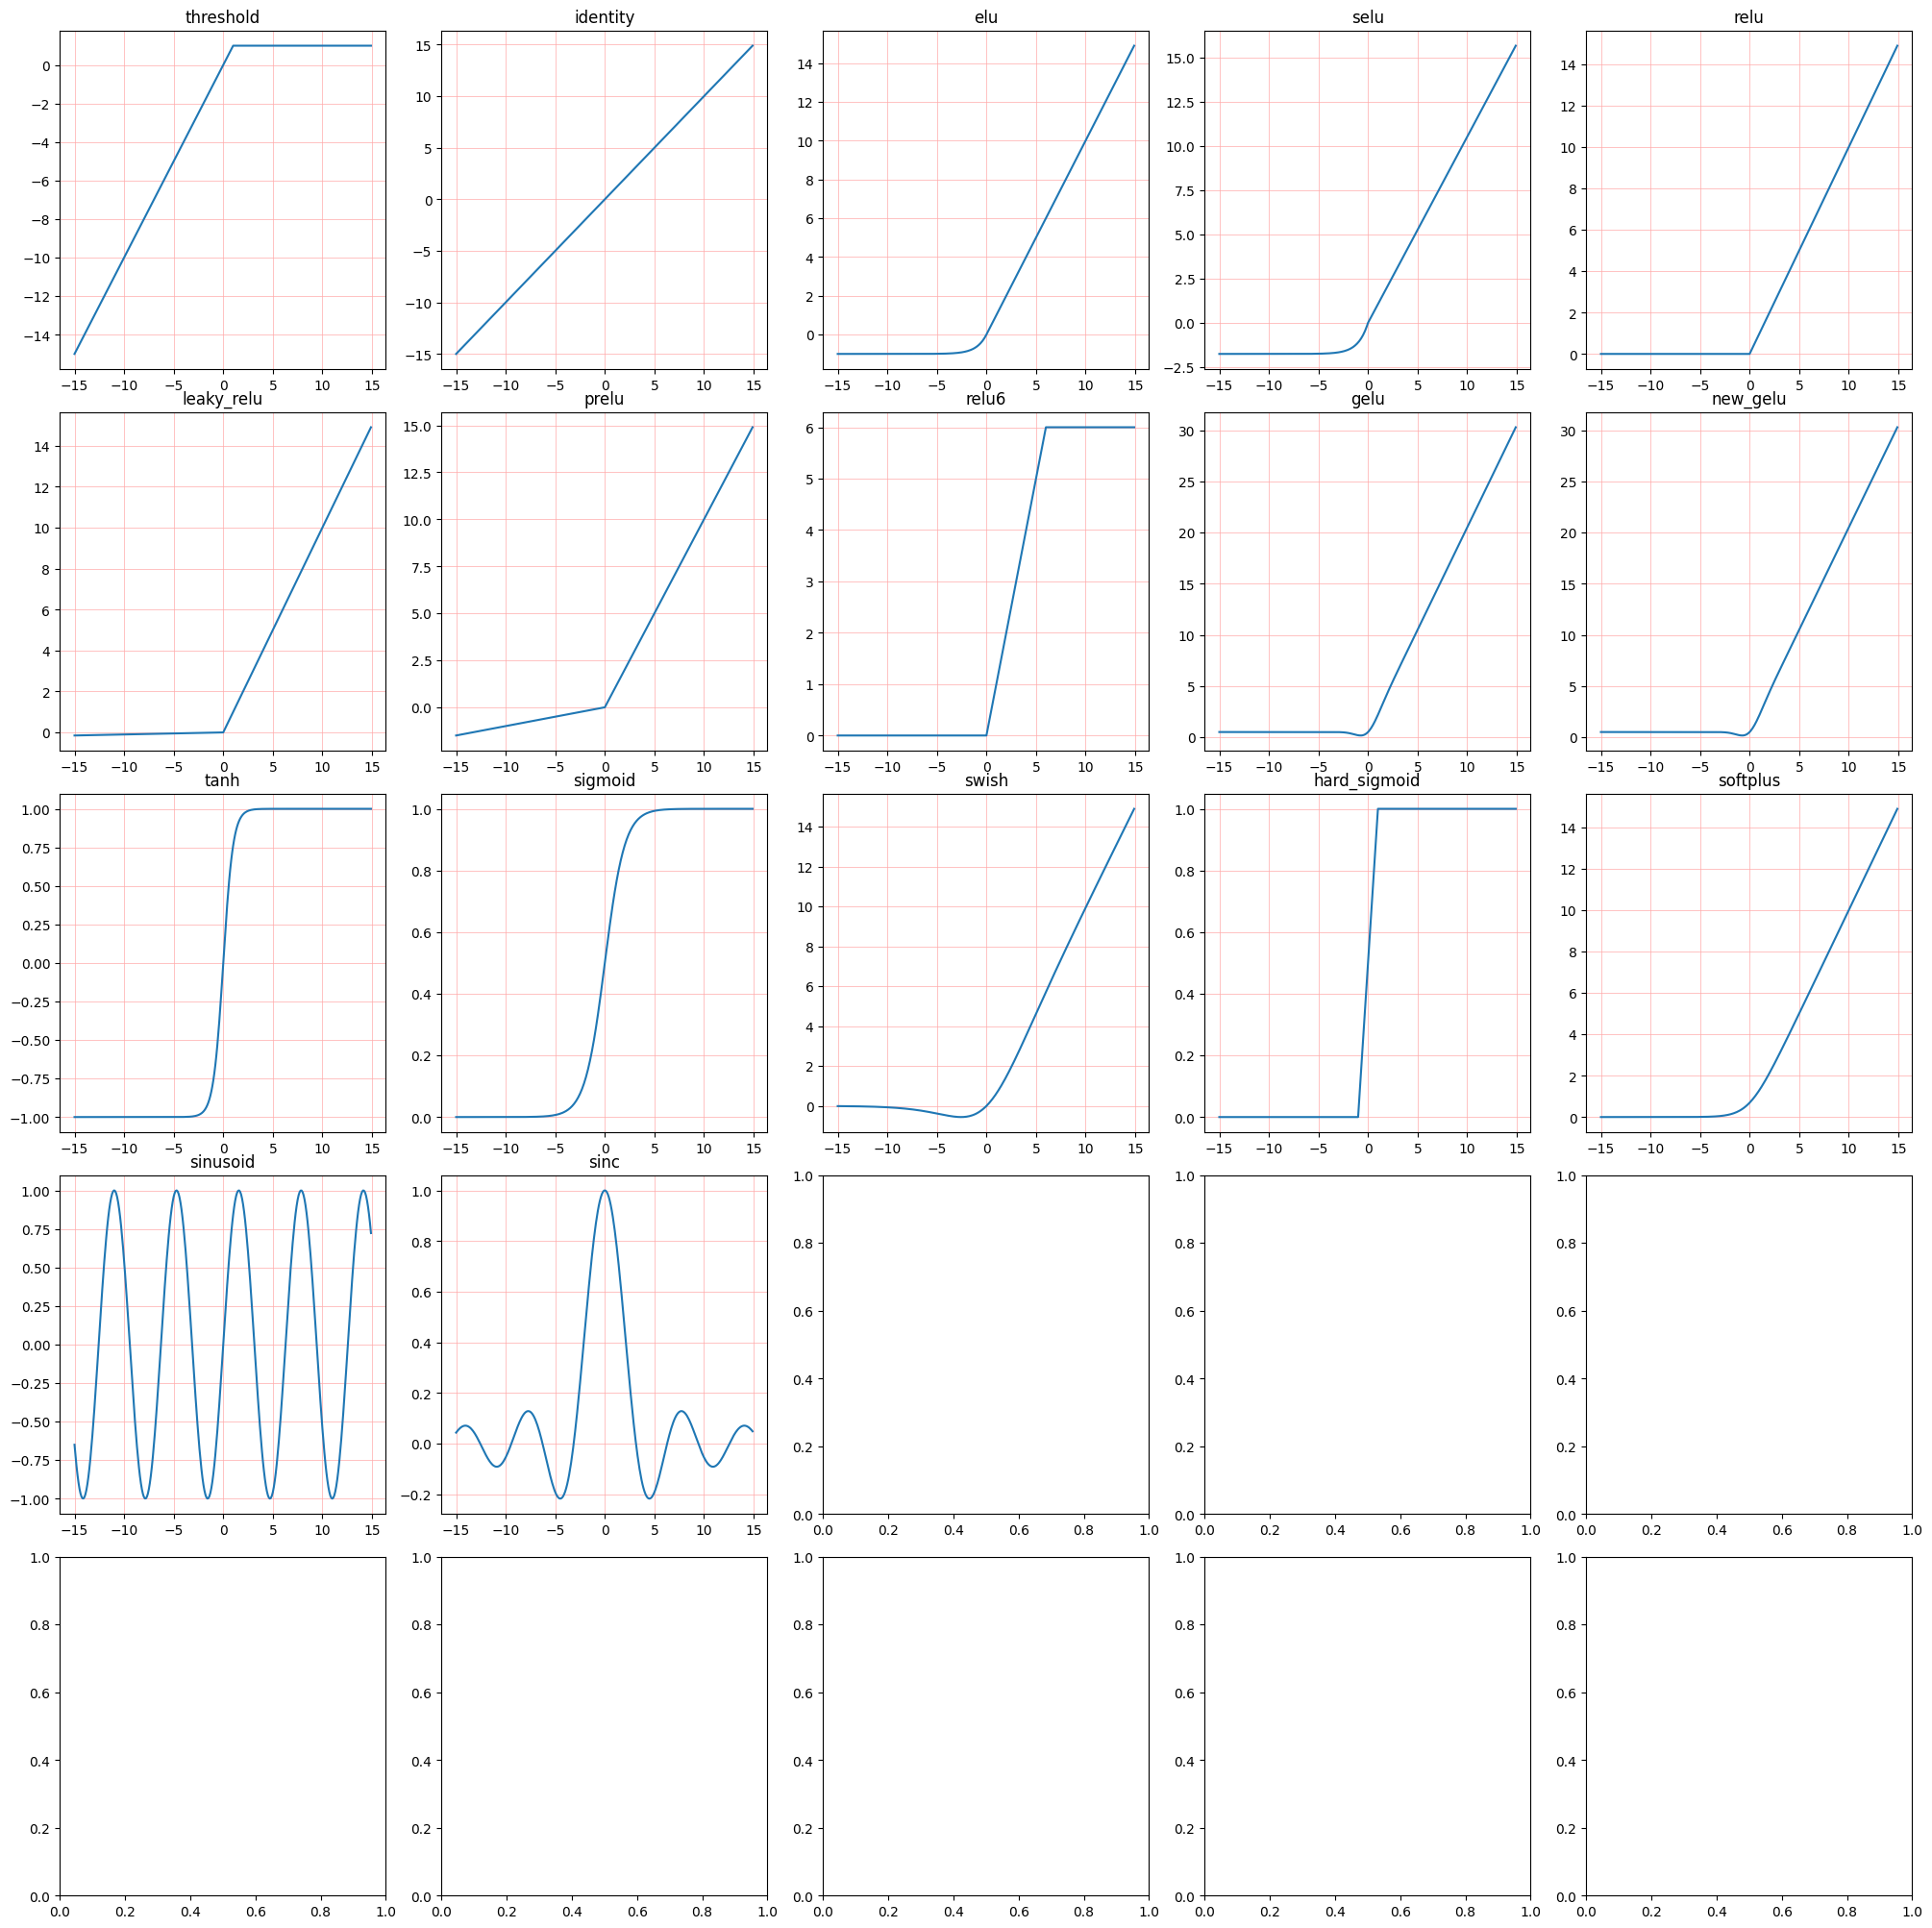

In [23]:
x = np.arange(-15,15,0.1)

funcs = [ 
    threshold, identity, elu, selu, 
    relu, leaky_relu, prelu, relu6, gelu, new_gelu,
    tanh, sigmoid, swish, hard_sigmoid, softplus, 
    sinusoid, sinc ]

l = int(np.sqrt(len(funcs)))+1

fig, ax = plt.subplots(l, l, figsize=(20,20))
fig.tight_layout()

for i,f in enumerate(funcs):
    ax[int(i/l)][i%l].plot(x,f(x), '-')
    ax[int(i/l)][i%l].set_title(f.__name__)
    ax[int(i/l)][i%l].grid(color='#FFAAAA', linestyle='-', linewidth=0.5)
    
plt.show()